In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('kc_house_data.csv')

### **EXPLORATORY DATA ANALYSIS AND FEATURE ENGINEERING**

In [ ]:
df.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Figure size 720x432 with 0 Axes>

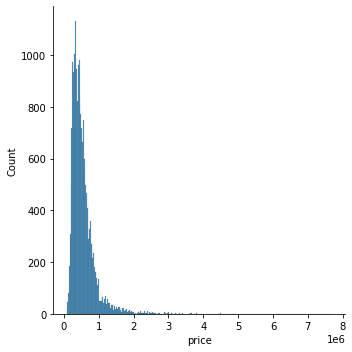

In [ ]:
plt.figure(figsize = (10,6))
sns.displot(df['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


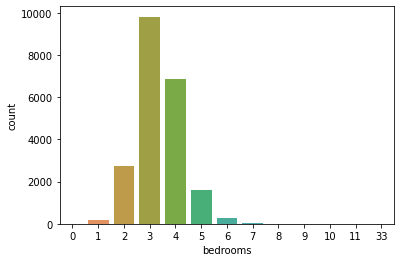

In [ ]:
sns.countplot(df['bedrooms'])

In [ ]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [ ]:
df.corr()['price']

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [ ]:
df.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

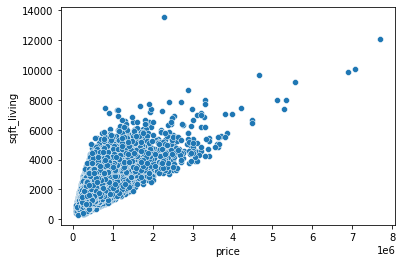

In [ ]:
sns.scatterplot(x='price' , y = 'sqft_living' , data = df)

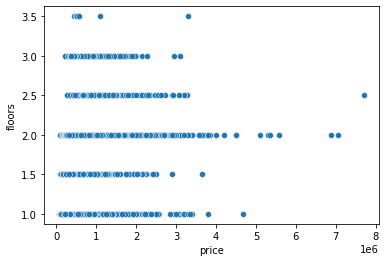

In [ ]:
sns.scatterplot(x = 'price' , y = 'floors' , data = df)

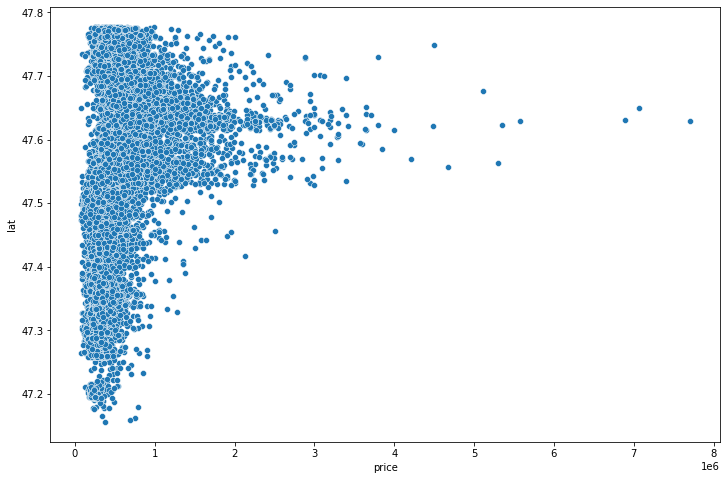

In [ ]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'price' , y = 'lat' , data = df)

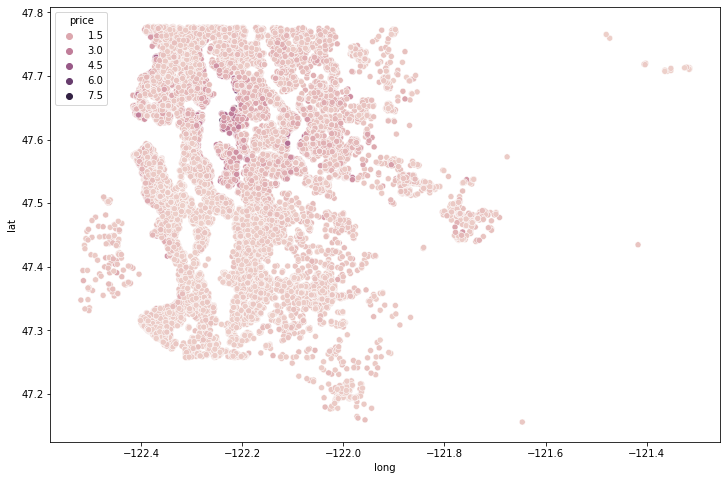

In [ ]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'long' , y = 'lat' , data = df , hue = 'price')

In [ ]:
len(df)*0.01

216.13

In [ ]:
df2 = df.sort_values('price' , ascending = False).iloc[216:]

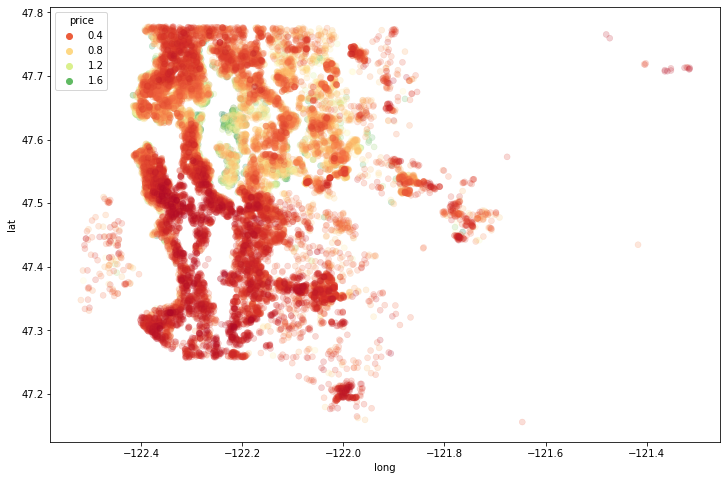

In [ ]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'long' , y = 'lat' , data = df2 ,edgecolor = None,alpha = 0.2,palette = 'RdYlGn', hue = 'price')

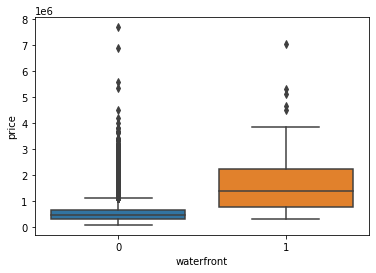

In [ ]:
sns.boxplot(x = 'waterfront',y = 'price' , data =df)

In [ ]:
df = df.drop('id' , axis = 1)

In [ ]:
df['date'] = pd.to_datetime(df['date']) 

In [ ]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [ ]:
df['year'] = df['date'].apply(lambda date : date.year )
df['month'] = df['date'].apply(lambda date : date.month )

In [ ]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


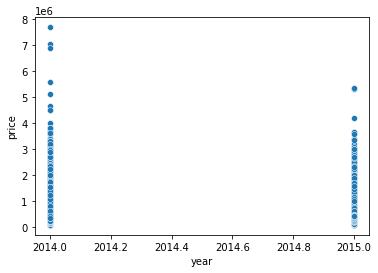

In [ ]:
sns.scatterplot(x= 'year' , y = 'price' , data = df)

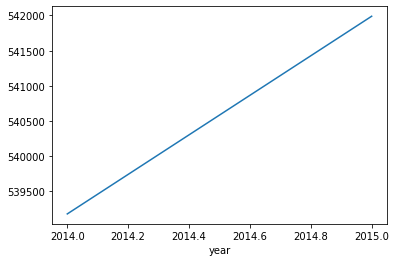

In [ ]:
df.groupby('year').mean()['price'].plot()

In [ ]:
df = df.drop('date',axis=1)

In [ ]:
df = df.drop('zipcode' , axis =1)

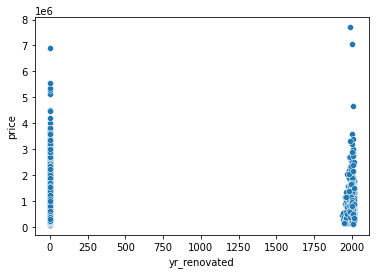

In [ ]:
sns.scatterplot(x= 'yr_renovated' , y = 'price' , data = df)

## **CREATING MODEL**

In [ ]:
X = df.drop('price' , axis = 1).values
y = df['price'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X,y)

MinMaxScaler()

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.fit(X_train,y_train,validation_data = (X_test,y_test),batch_size = 128 , epochs = 400)

Epoch 1/400
119/119 [==============================] - 1s 4ms/step - loss: 423609237504.0000 - val_loss: 432887332864.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 420313432064.0000 - val_loss: 421047304192.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 375618764800.0000 - val_loss: 322224488448.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 216357814272.0000 - val_loss: 134014451712.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 105263415296.0000 - val_loss: 104655831040.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 98513764352.0000 - val_loss: 102659432448.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 96639082496.0000 - val_loss: 100667604992.0000
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 94738210816.0000 - val_loss: 98580054016.0000
Epoch 9/400
119/119 

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses

,loss,val_loss
0,4.236092e+11,4.328873e+11
1,4.203134e+11,4.210473e+11
2,3.756188e+11,3.222245e+11
3,2.163578e+11,1.340145e+11
4,1.052634e+11,1.046558e+11
...,...,...
395,2.745640e+10,2.735502e+10
396,2.745445e+10,2.732271e+10
397,2.737962e+10,2.735668e+10
398,2.737178e+10,2.727654e+10


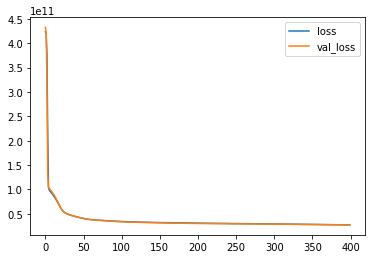

In [ ]:
losses.plot()

In [ ]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , explained_variance_score

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_predict)

27302976608.260235

In [ ]:
mean_absolute_error(y_test,y_predict)

103143.35534223665

In [ ]:
explained_variance_score(y_test,y_predict)

0.8054855625753531

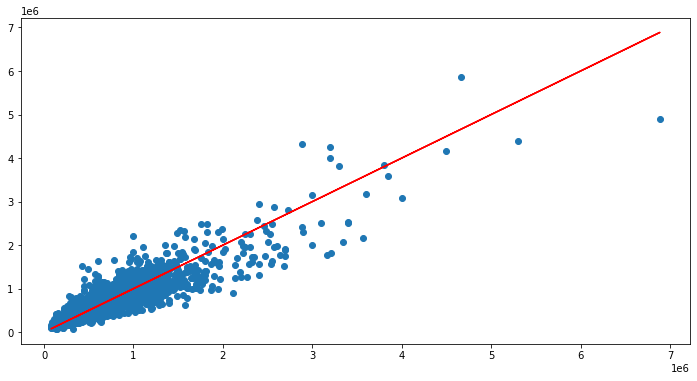

In [ ]:
plt.figure(figsize = (12,6))
plt.scatter(y_test,y_predict)
plt.plot(y_test,y_test, 'r')

In [ ]:
single_house = df.drop('price' , axis =1).iloc[0]

In [ ]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [ ]:
model.predict(single_house)

array([[282093.25]], dtype=float32)

In [ ]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
